In [210]:
import matplotlib.pyplot as plt
import matplotlib.lines as mline
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import yfinance as yf
from sklearn.linear_model import LinearRegression
import numpy as np


In [196]:
btc = yf.Ticker("BTC-USD")

# Get historical data for Bitcoin
btc_data = btc.history(period="max")  # 'max' for all available data; you can also use '1d', '1mo', '1y', etc.

In [197]:
btc_data.head

<bound method NDFrame.head of                                    Open          High           Low  \
Date                                                                  
2014-09-17 00:00:00+00:00    465.864014    468.174011    452.421997   
2014-09-18 00:00:00+00:00    456.859985    456.859985    413.104004   
2014-09-19 00:00:00+00:00    424.102997    427.834991    384.532013   
2014-09-20 00:00:00+00:00    394.673004    423.295990    389.882996   
2014-09-21 00:00:00+00:00    408.084991    412.425995    393.181000   
...                                 ...           ...           ...   
2024-04-19 00:00:00+00:00  63510.750000  65481.597656  59651.390625   
2024-04-20 00:00:00+00:00  63851.101562  65442.457031  63172.402344   
2024-04-21 00:00:00+00:00  64992.816406  65723.242188  64277.722656   
2024-04-22 00:00:00+00:00  64935.632812  67233.960938  64548.179688   
2024-04-23 00:00:00+00:00  66845.789062  67199.242188  66015.617188   

                                  Close       

In [198]:

y = btc_data["Close"].to_numpy()
X = np.array([y[i-10:i] for i in range(10, len(y))])
y = y[10:]
print(X)

[[  457.33401489   424.44000244   394.79598999 ...   423.20498657
    411.57400513   404.42498779]
 [  424.44000244   394.79598999   408.9039917  ...   411.57400513
    404.42498779   399.51998901]
 [  394.79598999   408.9039917    398.8210144  ...   404.42498779
    399.51998901   377.18099976]
 ...
 [70060.609375   67195.8671875  63821.47265625 ... 63512.75390625
  63843.5703125  64994.44140625]
 [67195.8671875  63821.47265625 65738.7265625  ... 63843.5703125
  64994.44140625 64926.64453125]
 [63821.47265625 65738.7265625  63426.2109375  ... 64994.44140625
  64926.64453125 66837.6796875 ]]


In [199]:
print(len(X))
print(len(y))

3497
3497


In [200]:
# Split the dataset into training and testing sets in ratio 9:1
train_size = int(len(X) * 0.9)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [201]:
# Create an ElasticNetCV model instance (cross-validated Elastic Net)
elastic_net_cv = ElasticNetCV(cv=5, random_state=0)
# model = LinearRegression().fit(X_train, y_train)

In [202]:
# Fit the model
elastic_net_cv.fit(X_train, y_train)


ElasticNetCV(cv=5, random_state=0)

In [203]:
# Predict on the test set
y_pred = elastic_net_cv.predict(X_test)
# y_pred = model.predict(X_test)

In [204]:
print(y_pred)

[27666.25799981 27612.74819211 27139.65153533 26852.93702713
 26780.54813271 26875.98088919 27101.25251886 27046.00859136
 27286.29750569 26944.79181064 26866.20491557 27045.51757023
 26819.08896362 26812.7619848  27105.97168885 26528.91657819
 26442.80658717 26635.54015579 26800.20667993 27744.42866022
 27770.19559542 27689.7266432  27320.26215597 26910.15640038
 27128.27820085 27084.8067443  27086.29487395 26087.74750298
 26878.92296328 26518.6229036  26463.92853476 26465.62664689
 25992.61809225 25916.58882836 25894.39527087 25894.08476128
 25310.86981075 25465.57492146 26107.59240376 26419.40525085
 26348.87113932 26699.67216056 27908.93537333 29514.86214265
 29846.66664136 30448.62805698 30523.10693435 30456.78746845
 30286.00587256 30547.43945579 30192.6291856  30335.78174397
 30428.4864852  30526.48997175 30576.78455258 30984.03536868
 30824.20789676 30556.37100685 30040.46851241 30218.68377159
 30264.50499049 30170.44360342 30324.67911062 30531.02572896
 30411.40327057 31170.20

In [205]:
print(len(y_pred))
print(len(y_test))

350
350


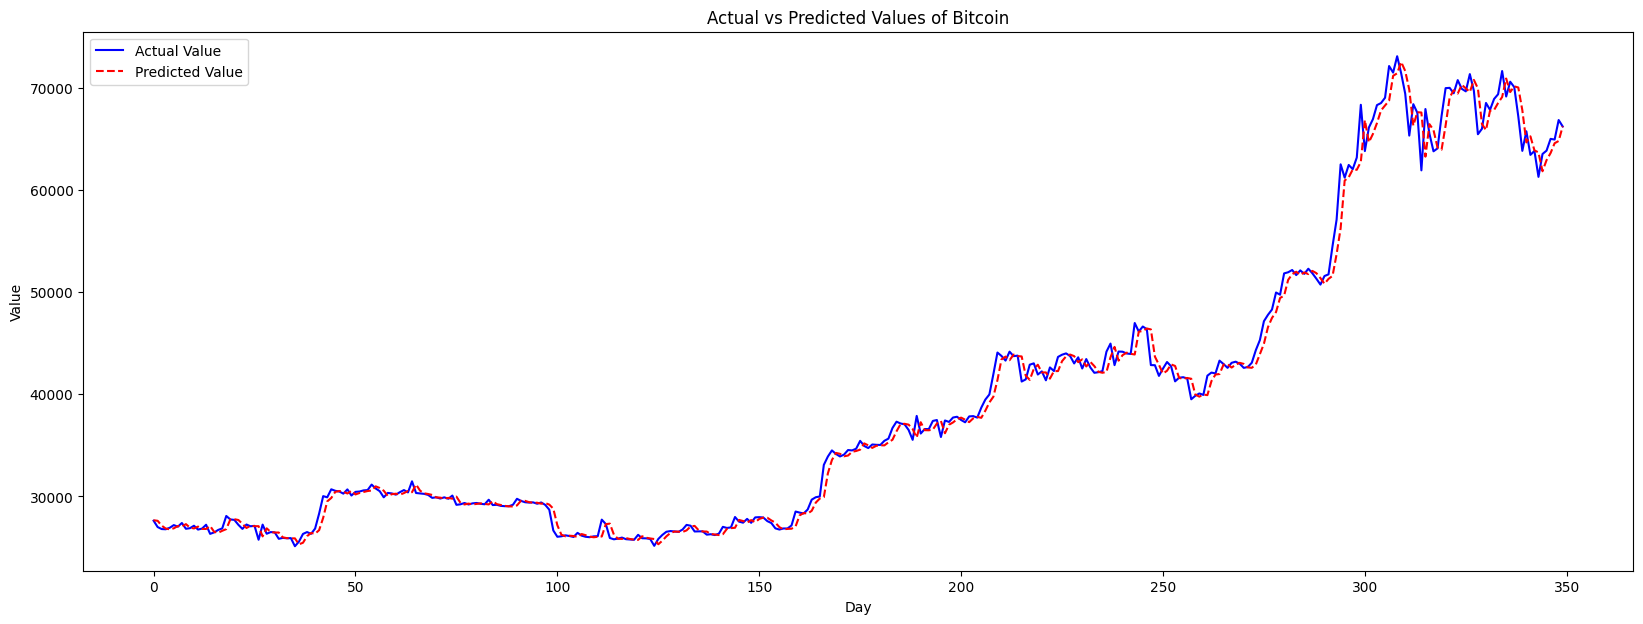

In [212]:
# Plot the predicted vs actual values
plt.figure(figsize=(20, 7))
plt.plot(y_test, label='Actual Value', color='blue')
plt.plot(y_pred, label='Predicted Value', color='red', linestyle='--')
plt.legend()
plt.title('Actual vs Predicted Values of Bitcoin')
plt.xlabel('Day')
plt.ylabel('Value')
plt.show()




In [207]:
# Evaluate the model

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 1449014.0004634643
R^2 Score: 0.99277336281306
